Plot S1B NRCS available from http://nbstds.met.no/thredds/catalog/NBS/S1B/2019/08/21/IW/catalog.html?dataset=nbs/S1B/2019/08/21/IW/S1B_IW_GRDM_1SDV_20190821T155906_20190821T155939_017686_021461_7D4D.nc

1. Plot it using the OPeNDAP stream
2. Plot it using the downloaded netCDF file (available from HTTPServer link)

In [1]:
import os, sys
sys.path.append('/home/vagrant/project')
sys.path.append('/vagrant')
os.environ['PROJ_LIB'] = '/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/share/proj'
os.environ['DJANGO_SETTINGS_MODULE'] = 'project.settings'

In [2]:
import django
django.setup()

from django.conf import settings

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.tools import haversine
from openwind import sar_wind
from geospaas_wind.utils import wind_from_sar_and_arome_forecast

In [4]:
%matplotlib inline
import cartopy.feature as cfeature
from cartopy import config
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [5]:
# S1B OPeNDAP stream
fn = 'http://nbstds.met.no/thredds/dodsC/NBS/S1B/2019/08/21/IW/S1B_IW_GRDM_1SDV_20190821T155906_20190821T155939_017686_021461_7D4D.nc'

In [6]:
n = Nansat(fn)

/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/lib/python3.6/site-packages/nansat/mappers/opendap.py:112: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/lib/python3.6/site-packages/nansat/mappers/opendap.py:114: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')


In [7]:
n.resize(pixelsize=1000)

0.04006915663203421

In [8]:
s0 = 10.*np.log10(n['sigma0_VV'])

In [9]:
lon, lat = n.get_geolocation_grids()

In [10]:
s0[np.isinf(s0)] = np.nan

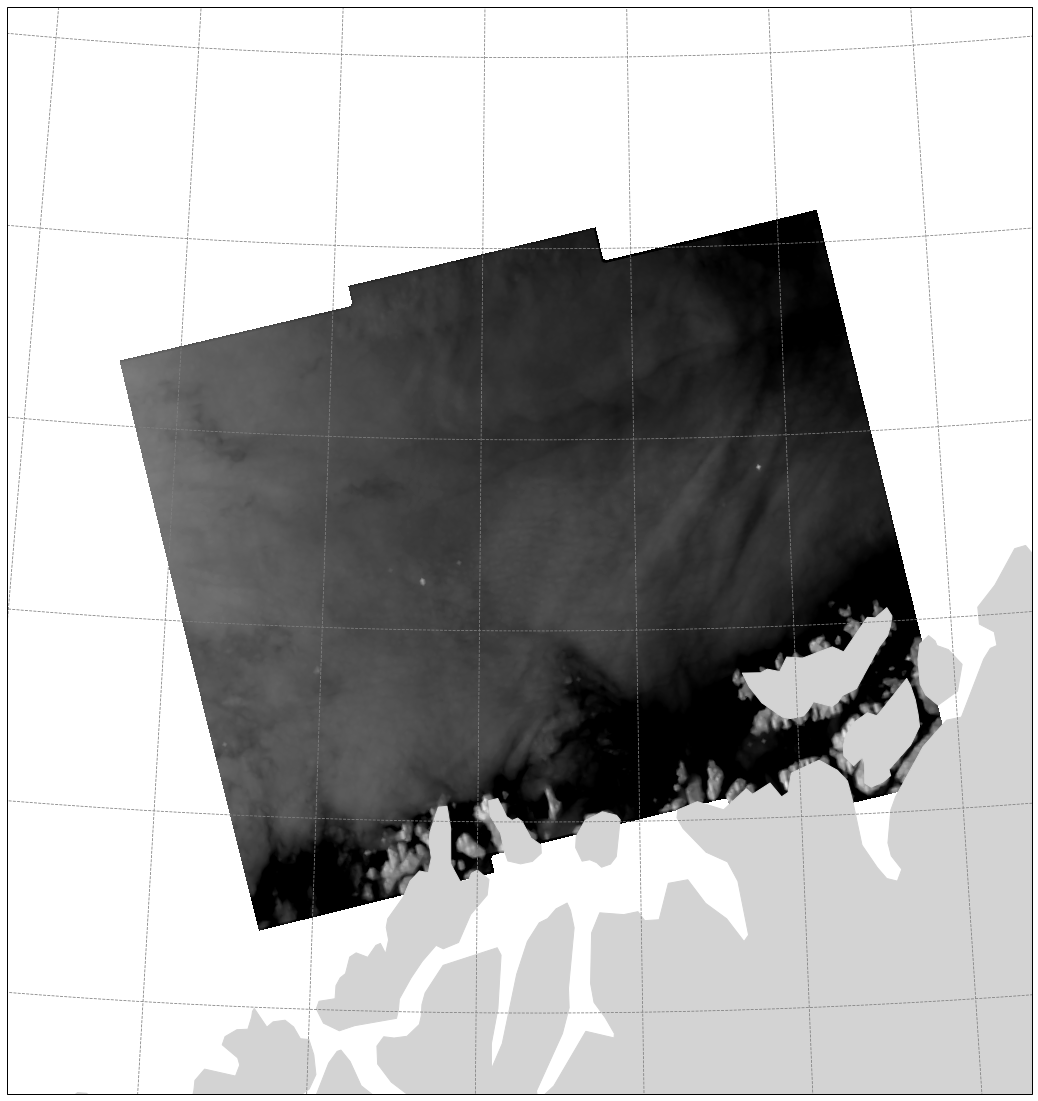

In [11]:
globe = ccrs.Globe(ellipse='WGS84', semimajor_axis=6378137, flattening=1/298.2572235604902)
proj = ccrs.Stereographic(central_longitude=np.mean(lon), central_latitude=np.mean(lat), globe=globe)

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': proj}, figsize=(20, 20))
extent = [np.min(lon)-.5, np.max(lon)+.5, np.min(lat)-.5, np.max(lat)+.5]
#extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)]
land_f = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray')

axs.set_extent(extent, crs=ccrs.PlateCarree())
# THIS IS FASTER THAN contourf BUT I CAN'T GET IT CORRECTLY...
#im = axs.imshow(np.flipud(s0), extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], transform=ccrs.PlateCarree(), cmap='gray', clim=[-20,0], interpolation=None)
axs.gridlines(color='gray', linestyle='--')
axs.add_feature(land_f)
#axs.coastlines(resolution='10m')
axs.contourf(lon, lat, s0, 400, vmin=-20, vmax=0, transform=ccrs.PlateCarree(), cmap='gray')
#axs.set_title('NRCS', y=1.05, fontsize=20)

In [12]:
fn = '/vagrant/S1B_IW_GRDM_1SDV_20190821T155906_20190821T155939_017686_021461_7D4D.nc'
n = Nansat(fn)
n.resize(pixelsize=1000)
s0 = 10.*np.log10(n['sigma0_VV'])
s0[np.isinf(s0)] = np.nan
lon, lat = n.get_geolocation_grids()

=>Sentinel-1 GRD data<=


/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/lib/python3.6/site-packages/nansat/mappers/mapper_netcdf_cf.py:390: UserWarning: GDAL cannot determine the dataset projection - using Nansat spatial reference WKT, assuming a regular longitude/latitude grid
  warnings.warn('GDAL cannot determine the dataset projection - using Nansat ' \


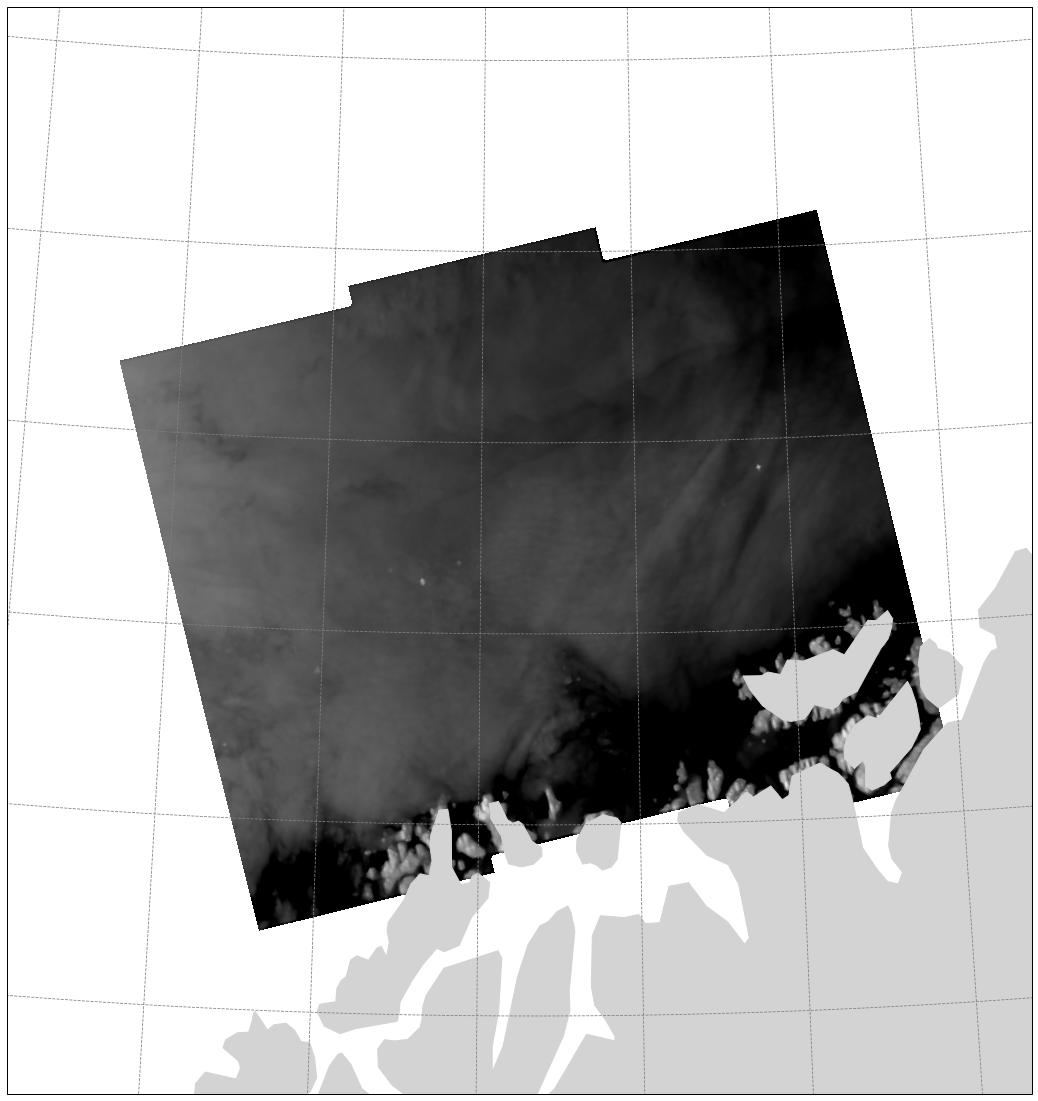

In [13]:
globe = ccrs.Globe(ellipse='WGS84', semimajor_axis=6378137, flattening=1/298.2572235604902)
proj = ccrs.Stereographic(central_longitude=np.mean(lon), central_latitude=np.mean(lat), globe=globe)

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': proj}, figsize=(20, 20))
extent = [np.min(lon)-.5, np.max(lon)+.5, np.min(lat)-.5, np.max(lat)+.5]
land_f = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray')

axs.set_extent(extent, crs=ccrs.PlateCarree())
axs.gridlines(color='gray', linestyle='--')
axs.add_feature(land_f)
#axs.coastlines(resolution='10m')
axs.contourf(lon, lat, s0, 400, vmin=-20, vmax=0, transform=ccrs.PlateCarree(), cmap='gray')
#axs.set_title('NRCS', y=1.05, fontsize=20)